In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/paul8/Downloads/HistoricalQuotes.csv")
data = data.iloc[::-1]
data.columns = data.columns.str.strip()
data = data.drop("Date", axis=1)
data.head()

,Close,Volume,Open,High,Low
1258,29.5575,137101680,29.3800,29.6500,29.2150
1257,28.9050,185207720,29.4100,29.4225,28.7700
1256,29.0425,116634560,29.0100,29.2350,28.8775
1255,28.2950,187240080,28.7975,28.8475,28.2128
1254,28.1200,258712880,28.0450,28.1700,27.4475


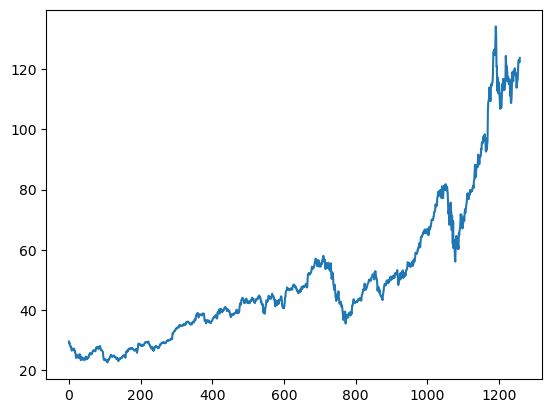

In [4]:
plt.plot(np.arange(0,len(data.Close)),data.Close)

In [5]:
def get_lag(df, trailing_window_size):
    df_lagged = df.copy()
    for window in range(1, trailing_window_size + 1):
        shifted = df.shift(window)
        shifted.columns = [x + "_lag" + str(window) for x in df.columns]
        df_lagged = pd.concat((df_lagged, shifted), axis=1)
        df_lagged = df_lagged.dropna()
    return(df_lagged)
X_lagged = get_lag(data, 1)
#X_lagged = X_lagged.iloc[::-1]

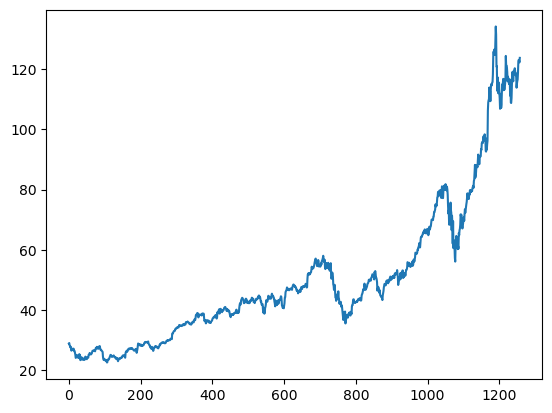

In [6]:
plt.plot(np.arange(0,len(X_lagged.Close)),X_lagged.Close)

In [7]:
X, Y = X_lagged.drop(["Close","Volume","Open","High","Low"],axis=1),X_lagged.Close
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.5, random_state=42, shuffle=False)

In [8]:
#model = XGBRegressor()
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [9]:
Y_pred = model.predict(X_test)
Y_pred_train = model.predict(X_train)

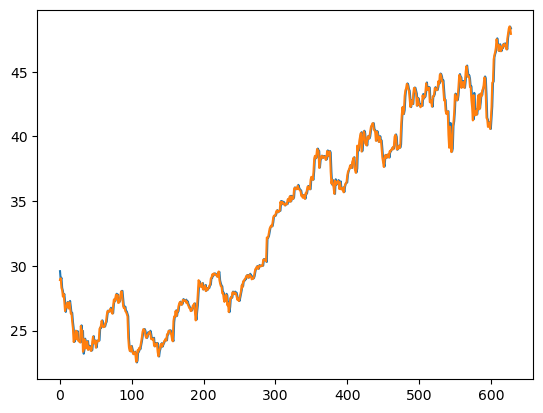

In [10]:
plt.plot(np.arange(0,len(Y_pred_train)),Y_pred_train)
plt.plot(np.arange(0,len(Y_train)),Y_train)


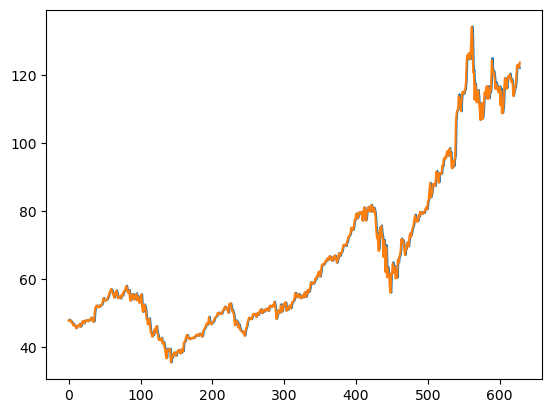

In [11]:
plt.plot(np.arange(0,len(Y_pred)),Y_pred)
plt.plot(np.arange(0,len(Y_test)),Y_test)


In [12]:
model.coef_

array([ 9.50143010e-01, -5.25795023e-10, -1.58116936e-01,  2.22832533e-01,
       -1.70032321e-02])

In [13]:
from sklearn.metrics import mean_absolute_error

baseline = X_test.Close_lag1
MAE_b = mean_absolute_error(Y_test, baseline)
MAE_m = mean_absolute_error(Y_test, Y_pred)

print(MAE_b)
print(MAE_m)

1.0949841017488078
1.0917298131851152


In [14]:
from sklearn.inspection import permutation_importance
importance = permutation_importance(model, X_test,
Y_test,n_repeats=10,random_state=42,scoring='neg_mean_absolute_error')

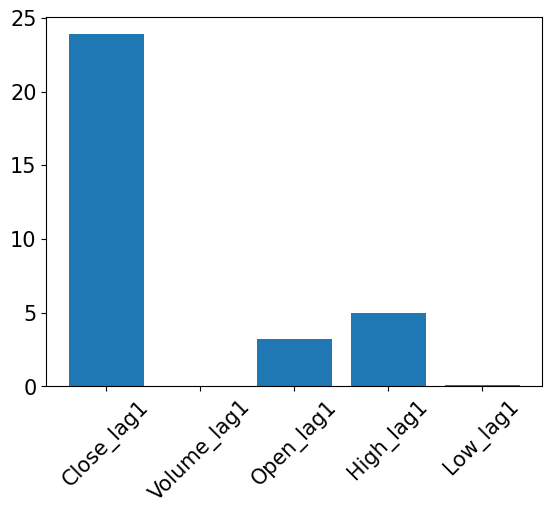

In [15]:
pos = np.arange(len(importance.importances_mean))
plt.bar(pos,importance.importances_mean,tick_label=X_test.columns)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()